In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
y = train['NU_NOTA_MT']
train = train[test.columns]

In [4]:
display(train.head())
display(train.isna().sum())

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,NaN,E,D,C,A,A,B,F,A


NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATU

In [5]:
train.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [6]:
cat_features = ['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_SEXO',
                'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
                'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
                'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 
                'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 
                'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
                'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 
                'CO_PROVA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 
                'Q001', 'Q002', 'Q006', 'Q024', 'Q025',
                'Q026', 'Q027', 'Q047']
num_features = ['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
                'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
                'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02b3d33eb8>,
      dtype=object)

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,TP_ESCOLA
count,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,21.593809,473.495155,529.661087,516.472841,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,1.353532
std,7.043654,71.093674,73.726344,68.688190,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.558472
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,419.900000,480.400000,468.100000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,1.000000
50%,19.000000,459.800000,532.000000,520.900000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,1.000000
75%,23.000000,514.500000,581.200000,564.900000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,2.000000
max,67.000000,806.400000,807.000000,763.600000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,4.000000


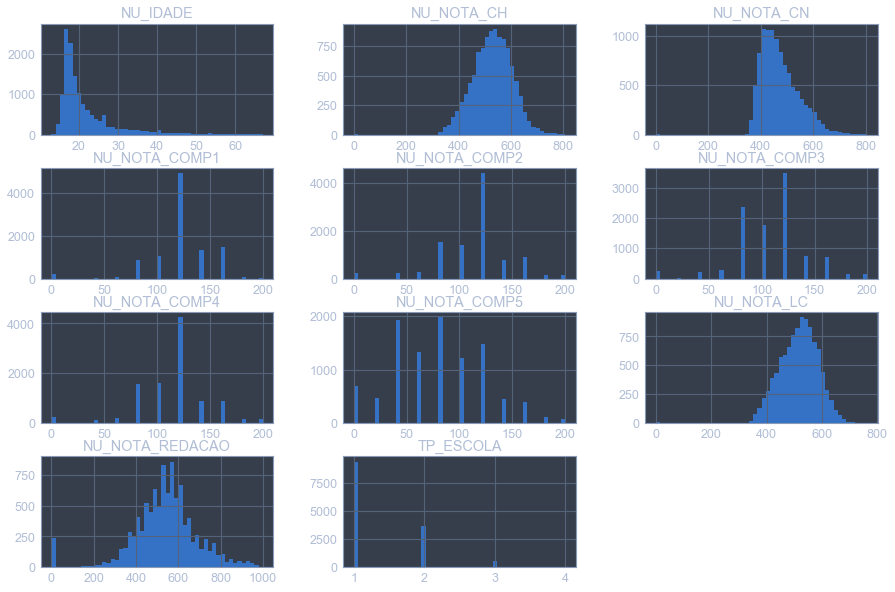

In [7]:
display(train[num_features].hist(bins=50, figsize=(15,10)))
display(train[num_features].describe())

In [8]:
for cat in cat_features:
    print(train[cat].value_counts())

35    2138
23    1785
31    1374
29     912
33     804
41     637
26     619
15     594
21     593
43     556
52     502
25     316
22     292
13     274
42     273
32     272
51     271
24     258
53     232
27     210
50     187
28     183
17     167
11     108
16      73
12      67
14      33
Name: CO_UF_RESIDENCIA, dtype: int64
SP    2138
CE    1785
MG    1374
BA     912
RJ     804
PR     637
PE     619
PA     594
MA     593
RS     556
GO     502
PB     316
PI     292
AM     274
SC     273
ES     272
MT     271
RN     258
DF     232
AL     210
MS     187
SE     183
TO     167
RO     108
AP      73
AC      67
RR      33
Name: SG_UF_RESIDENCIA, dtype: int64
F    8491
M    5239
Name: TP_SEXO, dtype: int64
3    6693
1    4589
2    1794
4     312
0     241
5     101
Name: TP_COR_RACA, dtype: int64
1    13121
2      548
4       40
0       13
3        8
Name: TP_NACIONALIDADE, dtype: int64
1    6524
2    4283
3    2306
4     617
Name: TP_ST_CONCLUSAO, dtype: int64
0     7206
1     1578
10

In [9]:
from sklearn.preprocessing import OrdinalEncoder
color = OrdinalEncoder()
cor_provas = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']
train[cor_provas] = color.fit_transform(train[cor_provas])

In [10]:
from sklearn.base import TransformerMixin

In [11]:
removal = ['SG_UF_RESIDENCIA', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
                    'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
                    'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN']

In [12]:
class ConditionTransformer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        df['IN_CONDICAO'] = (df['IN_BAIXA_VISAO'] | df['IN_CEGUEIRA'] | 
                                df['IN_SURDEZ'] | df['IN_DISLEXIA'] |
                                df['IN_DISCALCULIA'] | df['IN_GESTANTE'] | 
                                df['IN_IDOSO'])
        df.drop(removal, axis=1, inplace=True)
        df['TP_NACIONALIDADE'].replace([4, 3], [1, 2], inplace=True)
        df['TP_ESCOLA'].replace(4, 1, inplace=True)
        return df

In [13]:
condition = ConditionTransformer()
train = condition.fit_transform(train)

In [14]:
cat_features.append('IN_CONDICAO')
for r in removal:
    cat_features.remove(r)

In [15]:
for cor in cor_provas:
    print(train[cor].value_counts())

3.0    3389
1.0    2646
7.0    2591
8.0    2454
4.0    2399
2.0      66
9.0      65
5.0      60
0.0      59
6.0       1
Name: CO_PROVA_CN, dtype: int64
1.0    3389
5.0    2646
3.0    2591
8.0    2454
4.0    2399
2.0      66
0.0      65
6.0      60
9.0      59
7.0       1
Name: CO_PROVA_CH, dtype: int64
2.0    3597
6.0    2664
0.0    2454
1.0    2403
5.0    2364
8.0      67
7.0      64
4.0      63
3.0      54
Name: CO_PROVA_LC, dtype: int64
2.0    3597
3.0    2664
7.0    2454
8.0    2403
6.0    2364
0.0      67
1.0      64
5.0      63
4.0      54
Name: CO_PROVA_MT, dtype: int64


In [16]:
class ColorFixer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        df['CO_PROVA_CN'].replace([2, 9, 5, 0, 6], 2, inplace=True)
        df['CO_PROVA_CH'].replace([2, 0, 6, 9, 7], 2, inplace=True)
        df['CO_PROVA_LC'].replace([8, 7, 4, 3], 8, inplace=True)
        df['CO_PROVA_MT'].replace([0, 1, 5, 4], 0, inplace=True)
        return df

In [17]:
colors = ColorFixer()
train = colors.fit_transform(train)

In [18]:
train[num_features].isna().sum()

NU_IDADE              0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
TP_ESCOLA             0
dtype: int64

In [19]:
train[cat_features].isna().sum()

CO_UF_RESIDENCIA             0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_SABATISTA                 0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
Q001                         0
Q002                         0
Q006                         0
Q024                         0
Q025                         0
Q026                         0
Q027                      7373
Q047                         0
IN_CONDICAO                  0
dtype: int64

In [20]:
train['Q027'].fillna('Z', inplace=True)

In [21]:
train.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_SABATISTA', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047', 'IN_CONDICAO'],
      dtype='object')

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
train[train.columns] = imputer.fit_transform(train)

In [23]:
train.isna().sum()

NU_INSCRICAO              0
CO_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
IN_TREINEIRO              0
TP_DEPENDENCIA_ADM_ESC    0
IN_SABATISTA              0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
CO_PROVA_CN               0
CO_PROVA_CH               0
CO_PROVA_LC               0
CO_PROVA_MT               0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
Q001                      0
Q002                      0
Q006                      0
Q024                      0
Q025                      0
Q026                

In [24]:
encoder = OrdinalEncoder()
train[cat_features] = encoder.fit_transform(train[cat_features])

In [25]:
X = train.drop(['NU_INSCRICAO'], axis=1)
y = y.fillna(0)

In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [27]:
param_grid = [{
    'learning_rate': [0.1],
    'n_estimators': [100], 
    'max_depth': [3]
}]

clf_search = GridSearchCV(XGBRegressor(), param_grid=param_grid,
                         cv=5, scoring='r2', refit=True)
clf_search.fit(X, y)
print(clf_search.best_params_, round(clf_search.best_score_ * 100, 2))

/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} 92.66


In [28]:
feature_importances = {
'feature': X.columns,
'importance': clf_search.best_estimator_.feature_importances_
}
feature_importances = pd.DataFrame(data=feature_importances).sort_values(
    by='importance', ascending=False)

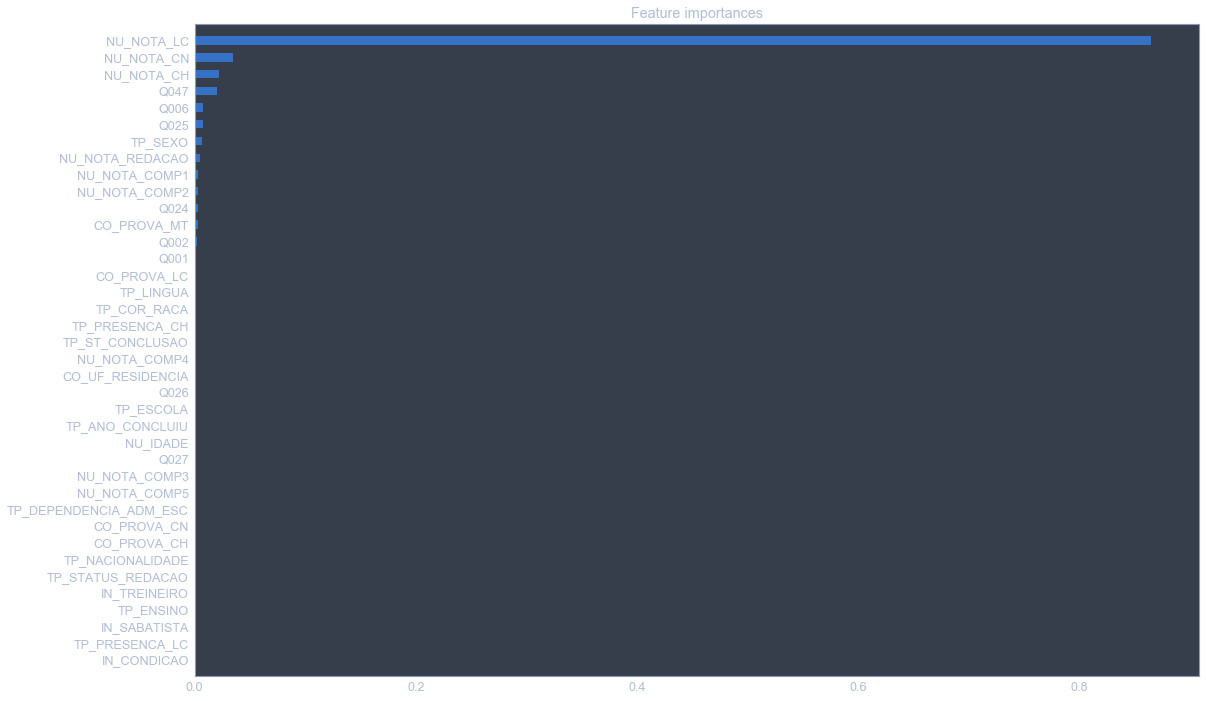

In [29]:
plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.barh(y=range(feature_importances.shape[0]),
         width=np.flip(feature_importances['importance'].values),
         height=0.5, color="b", align="center")
plt.yticks(range(feature_importances.shape[0]), np.flip(feature_importances['feature']))
plt.ylim([-1, feature_importances.shape[0]])
plt.show()

In [30]:
feature_importances

,feature,importance
20,NU_NOTA_LC,0.864510
18,NU_NOTA_CN,0.035055
19,NU_NOTA_CH,0.021693
36,Q047,0.020550
31,Q006,0.008037
33,Q025,0.007249
2,TP_SEXO,0.006428
28,NU_NOTA_REDACAO,0.004740
23,NU_NOTA_COMP1,0.003446
24,NU_NOTA_COMP2,0.002996


In [31]:
importance = feature_importances[feature_importances['importance'] >= 0.0001]['feature'].values

X_reduced = train[importance].copy()

param_grid = [{
    'learning_rate': [0.1],
    'n_estimators': [100], 
    'max_depth': [3]
}]

clf_search = GridSearchCV(XGBRegressor(), param_grid=param_grid,
                         cv=5, scoring='r2', refit=True)
clf_search.fit(X_reduced, y)
print(clf_search.best_params_, round(clf_search.best_score_ * 100, 2))

/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/flycher/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base',

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} 92.68


In [32]:
feature_importances_reduced = {
'feature': X_reduced.columns,
'importance': clf_search.best_estimator_.feature_importances_
}
feature_importances_reduced = pd.DataFrame(data=feature_importances_reduced).sort_values(
    by='importance', ascending=False)

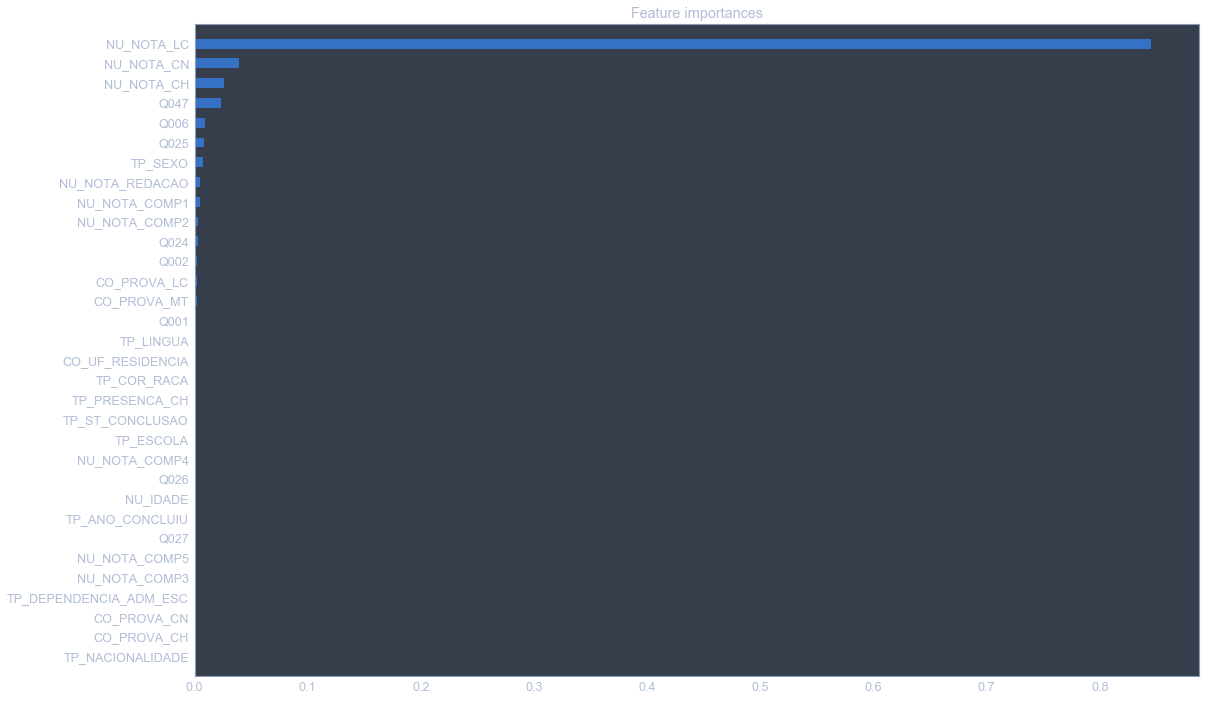

In [33]:
plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.barh(y=range(feature_importances_reduced.shape[0]),
         width=np.flip(feature_importances_reduced['importance'].values),
         height=0.5, color="b", align="center")
plt.yticks(range(feature_importances_reduced.shape[0]), np.flip(feature_importances_reduced['feature']))
plt.ylim([-1, feature_importances_reduced.shape[0]])
plt.show()

In [34]:
feature_importances_reduced

,feature,importance
0,NU_NOTA_LC,0.845362
1,NU_NOTA_CN,0.038879
2,NU_NOTA_CH,0.025627
3,Q047,0.023544
4,Q006,0.008912
5,Q025,0.008306
6,TP_SEXO,0.007365
7,NU_NOTA_REDACAO,0.004938
8,NU_NOTA_COMP1,0.004442
9,NU_NOTA_COMP2,0.003433


# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [35]:
falta_lc = (test['TP_PRESENCA_LC'] == 0)

In [36]:
test[cor_provas] = color.transform(test[cor_provas])

In [37]:
test = condition.transform(test)

In [38]:
test = colors.transform(test)

In [39]:
test['Q027'].fillna('Z', inplace=True)

In [40]:
test[test.columns] = imputer.transform(test)

In [41]:
test[cat_features] = encoder.transform(test[cat_features])

In [42]:
test.head(5)

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_CONDICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,20.0,22,0.0,3.0,1.0,0.0,5.0,1,0.0,...,420.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,7.0,26,0.0,3.0,1.0,0.0,8.0,1,0.0,...,580.0,4.0,1.0,2.0,1.0,1.0,1.0,5.0,0.0,0.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,9.0,21,1.0,1.0,1.0,1.0,0.0,2,3.0,...,320.0,4.0,4.0,3.0,1.0,1.0,0.0,13.0,0.0,0.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,4.0,27,0.0,3.0,1.0,0.0,8.0,1,0.0,...,0.0,7.0,4.0,6.0,1.0,1.0,0.0,13.0,0.0,0.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,20.0,18,1.0,1.0,1.0,1.0,0.0,2,1.0,...,320.0,3.0,7.0,7.0,2.0,1.0,0.0,13.0,0.0,0.0


In [43]:
nu_inscricao = test['NU_INSCRICAO']
nu_nota_mt = clf_search.predict(test[importance])

In [44]:
answer = pd.DataFrame({'NU_INSCRICAO': nu_inscricao, 
                       'NU_NOTA_MT': nu_nota_mt})

In [45]:
answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436.025970
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.054382
2,b38a03232f43b11c9d0788abaf060f7366053b6d,597.629272
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-0.572575
4,715494628a50142ce8cb17191cfe6d0f3cae0934,563.180237
5,e656d6bad65c93fb2880f1eba5037008c8e75774,478.955963
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,524.122681
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,423.320587
8,043c544a2104aa8a9849f1a703a08d37a2f16839,463.018585
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,449.890167


In [46]:
answer['FALTA'] = falta_lc

In [47]:
nota_min = np.min(y.values[np.nonzero(y.values)])

In [48]:
def falta(df):
    if df['FALTA'] or df['NU_NOTA_MT'] < nota_min:
        return 0
    return df['NU_NOTA_MT']

In [49]:
answer['NU_NOTA_MT'] = answer.apply(falta, axis='columns')

In [50]:
answer

,NU_INSCRICAO,NU_NOTA_MT,FALTA
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,436.025970,False
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.054382,False
2,b38a03232f43b11c9d0788abaf060f7366053b6d,597.629272,False
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000,True
4,715494628a50142ce8cb17191cfe6d0f3cae0934,563.180237,False
5,e656d6bad65c93fb2880f1eba5037008c8e75774,478.955963,False
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,524.122681,False
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,423.320587,False
8,043c544a2104aa8a9849f1a703a08d37a2f16839,463.018585,False
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,449.890167,False


In [51]:
answer.drop(labels='FALTA', axis=1, inplace=True)

In [52]:
answer.to_csv('answer.csv', index=False)